# Frequency of Newspaper Reading Throughout the Years

 *Professor Terence Johnson                              
Group 6: Nina Ysabel Alinsonorin & Daphne Pfoser*                  
Disclaimer: We both equally worked on this assignment together via a shared ipynb file, regardless of commits to our group repo!

How has the frequency of physical newspaper reading changed throughout the years? Could "recent" technological innovations have influenced patterns in human behavior and inclination in reading these recounts of daily life? This project aims to analyze these trends and draw conclusions from them.

>    Our data, pulled from the GSS Data Explorer, initially contained the years, a code, and a label as columns. The rows contained the counts for each indexed number. However, when the data was extracted, it only contained 3 columns: 'year' (the year), 'id' (keeping count of the row it's in), and 'value' (a number from the numbered index- typically ranging from -100 to 5.0). Essentially the data as presented in the Data Explorer became discombobulated and was placed in this format:

```
"Discombobulated"              Original (as seen in GSS)

Year  ID  Value             Code  Label      1972  1975  1977  1978  1982
1972  1    -100             -100  no answer   0      0     2    0     0
1972  2    3.0               1.0  everyday    1105  988   964   801   742
1972  3    -90               2.0  few times   241   235   254   303   289
1972  4    1.0               3.0  once        128   154   216   170   132
1972  5    5.0               4.0  < once      69    81    100   113   90
```
>  After cleaning the data back into the format as shown on GSS, we began to explore potential graphs that could capture the data in a way that would be meaningful. Because our data relied heavily on the frequency of which people read the newspaper per year, we decided that a line graph, stacked bar plot, and a heat plot would best serve to portray any potential trends.


> We ultimately found that as time passed, the frequency at which people read the newspaper (no matter if read every day or less than once a week) declined. Further, we inferred that certain historical events played a key role in this declination: the invention of the internet in 1983 and the invention of mobile phones with web-browsing capabilities in 1996. Though the invention of the internet was the primary reason for the decline in newspaper reading, there were certain years in which reading spiked. **Why?**






# The Data

**The Dataset and its Variables**.     
As aforementioned above, our main variables for the purpose of this project focused on the years, the numbered index outlining the frequency of newspaper reading, and the counts per number in the index per year. More specifically:

*   *Years*:  Though the GSS survey was given out from 1972 - 2022, there were some years which were not included in the original dataset. This included: 1973, 1974, 1976, 1979, 1980, 1981, 1984, 1992, 1995, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, and 2019. For the latter half of these years, we can attribute this to the fact that the survey is only given out every 2 years and so naturally, these will not appear in the dataset. However, we could not conclude why the former half of these years (where the pattern between the years is not 2), was omitted from the dataset.

*   *Numbered Index*: The frequency at which physical newspapers were read were based on a numbered index as follows:
  * -100.0: Inapplicable
  * -99.0: No answer
  * -98.0: Do not know/cannot choose
  * -97.0: Skipped on Web
  * 1.0: Every day
  * 2.0: A few times a week
  * 3.0: Once a week
  * 4.0: Less than once a week
  * 5.0: Never              
  For the purposes of this project, we decided to not use the negative indexed numbers as the fact that people just didn't answer the question doesn't help to establish any patterns and negative values would only take away from the aggregation of counts.

* *Counts per Number in the Index*: In order to more efficiently portray the amount of times each survey respondent responded with a number in the index, we summed up the amount of times each person responded per indexed number (1.0 - 5.0) per year. In doing so, the dataset became manipulated in a manner which appeared the same way as it did in the GSS database.








**Cleaning the Data**    
Because the extracted data came out in a way such that each occurence of numbered indexing per year became its own row (making the dataset extremely elongated and stretched out), we had to figure out a way to manipulate it so that it was exactly as shown in the database.

**1.**  We first pivoted the dataset so that each year became its own column instead of having the years as values.


In [3]:
import pandas as pd
import numpy as np

news = pd.read_csv('/GSS (1).csv')
news = news.pivot(index='id_', columns='year', values='news').reset_index()

**2.** Then, we dropped the years which were not included in the study. As previously mentioned under "The Dataset and its Variables," earlier years were included in the dataset, but only had NaN values- this would only make later coding processes more complicated so away they went! We also took this time to drop all of the negative values which were under the "numbered index" category."

In [4]:
news = news.drop([1973, 1974, 1976, 1980, 1984], axis = 1)
news = news[news >= 0]

**3.** Because we could not find a way around dropping NaN values without dropping entire rows or columns, we replaced the NaN values with 0.0. In doing so, they do not add nor subtract from the total counts of each frequency per year. For graphing purposes, these zeroes can be filtered out (saying to only graph frequency values >= 1.0).

In [5]:
news = news.fillna(0.0)

**4.** In order to store the frequency counts (1.0 - 5.0) per year, we coded a function which gathers the years from the dataframe and stores these counts for each specific year.

*   *value_counts()* counts how many unique values are from the dataframe (so from all the years)
*   *year_counts = {"Year": year}* stores the counts for each year
*   *for i in range(1, 6)* stores indexed numbers 1.0 - 5.0 stored in i
*   *year_counts[i] = counts.get(i, 0)* checks the counts to see if it will have a count, if not it gets a 0
*   *all_counts.append(year_counts)* collects the counts for all years



In [6]:
years = [1972, 1975, 1977, 1978, 1982, 1983, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1993, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2021, 2022]
all_counts = [] # stores the counts 1-5s for each year

for year in years:
    counts = news[year].value_counts() # value_counts() will count how many unique values are from the no_nas_news (so from all the years)
    year_counts = {"Year": year} # year_counts stores the counts for each year

    for i in range(1, 6): # have the numbers 1 - 5 stored in i
        year_counts[i] = counts.get(i, 0) # checks the counts to see if it will have a count, if not it gets a 0

    all_counts.append(year_counts) # collects the counts for all the years

news = pd.DataFrame(all_counts)

**5.** This then results in each indexed number (1.0 - 5.0) being columns and the years as rows, but we wanted the years as columns and indexed numbers as rows as seen below. To do so, we pivoted the dataframe to reverse the rows and columns.

```
index  Year        1    2    3    4     5
0       0  1972  1105  241  128   69    68
1       1  1975   981  235  126   81    65
2       2  1977   952  254  148  100    73
3       3  1978   874  308  154  113    79
4       4  1982   961  425  218  138   112
5       5  1983   891  331  170  127    80

```



In [7]:
news = news.melt(id_vars=['Year'], var_name='Value', value_name='Count')
news = news.pivot(index='Value', columns='Year', values='Count')

<ipython-input-7-929f856fd27a>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  news = news.pivot(index='Value', columns='Year', values='Count')


**6.** Finally, we reset the index and are left with our final, cleaned dataframe.

```
Year  Value  1972  1975  1977  1978  1982  1983  1985  1986  1987  ...  2004  \
0         1  1105   981   952   874   961   891   807   789   949  ...   358   
1         2   241   235   254   308   425   331   324   289   391  ...   222   
2         3   128   126   148   154   218   170   196   184   231  ...   134   
3         4    69    81   100   113   138   127   116   116   130  ...   121   
4         5    68    65    73    79   112    80    87    90   110  ...    71   
```



In [ ]:
news = news.reset_index()
print(news)

**Challenges in Managing the Data**         
> Reading, cleaning, and preparing data for analysis can present several challenges. When dealing with the General Social Survey (GSS) database, one significant issue is accessing the data itself. Extracting the data and converting it to a usable format, such as a CSV file, can be a cumbersome process. Often, GSS datasets are quite extensive, leading to challenges with file sizes and data handling. Additionally, dealing with compressed files or archives may require extra steps, such as unzipping, before the data can be accessed.

> In terms of cleaning the data, one of the primary challenges encountered was the ability to remove missing values (NaN) without inadvertently dropping entire rows or columns. This issue resulted in an empty dataframe, rendering it impossible to work with the data. To overcome this challenge, a workaround was implemented: missing values were temporarily stored as 0, allowing the data to be retained. Subsequently, when graphing or analyzing the data, we programmed the code to consider only values greater than or equal to 1.0, effectively excluding the missing or unreported data points. This was crucial for making GSS data more manageable and suitable for analysis.

# Results

**Line Plot: Overall Frequency of People Reading Newspapers Over Time**


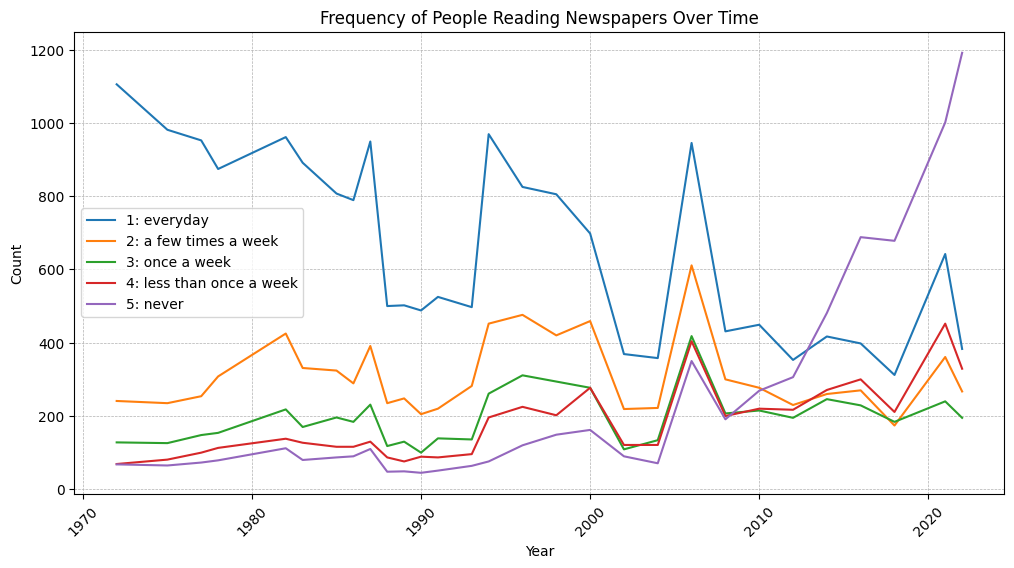

In [9]:
# Line Plot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# take out the Value column so you dont graph the frequency categories themselves since the value has the frequency categories
for index, row in news.iterrows(): # create a loop to go through each row of the dataset
    plt.plot(row.index[1:], row.values[1:], label=row['Value']) # plots the data from each row of the years
    # row.index[1:] gets the column names from 2 to the end (years) , row.values[1:] gets the frequency categories,
    # label=row['Value'] sets the label for the line 1-5 ( with the diff colors)

plt.title('Frequency of People Reading Newspapers Over Time')
plt.xlabel('Year')
plt.ylabel('Count') # number of people
plt.legend(labels = ['1: everyday', '2: a few times a week', '3: once a week', '4: less than once a week', '5: never'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5) # has the grid lines
plt.xticks(rotation=45)  # rotates x-axis labels

plt.show()

*Overall, how has the frequency of physical newspaper readings fluctuated throughout the years?*

>Our primary task focused on this question at hand. In order to view any preliminary patterns, we first made a line plot which looked at the frequency of people reading newspapers over time. The graph's axes depict the years (1972 - 2022) and the counts of frequencies from the numbered index, with the former being the x-axis and the latter being the y-axis. The legend depicts the five frequencies of weekly newspaper readings via a specific color (which then corresponds to a certain line on the graph). The blue line signifies people reading a newspaper every day; the orange line shows the people who read a newspaper once a week; the red line depicts the people who read their newspaper less than once a week; and finally, the purple line represents the people who never read the newspaper.

> The foremost trends which can be seen from the graph come from the blue and purple lines. The blue line- depicting daily reading- shows that people from the early 1970s until the 2000s always read their newspapers, and then in the early 2000s, there was a substantial decrease in the frequency at which people read the newspaper. To further this point, the graph shows that the purple line- representing never reading- had an extremely low count in the early 1970s. Then, in the early 2000's (around 2005 to be exact), there was a big spike in the count of people who never read newspapers, and it kept increasing as the years went by. Because the blue and purple lines represent opposite newspaper-reading behaviors, they can be said to have the same trend and pattern: there has been a decline in the frequency of people reading the news. Although the declining trend cannot be seen for the middle 3 frequencies, we don't necesssarily view this to counteract the overall pattern of a declining frequency in people reading the newspaper as they didn't have a polarizing jump in counts (when comparing their values from the 1970's to later 2000's).

> Overall, this line plot tells us that people's frequency of reading newspapers has decreased with a decline so drastic it could have only been promulgated by various technological innovations (effectively leading people to lean more towards getting a news source from an online feed rather than a physical tabloid). This claim, that technological innovations have exacerbated the decline in newspaper readings, is one that we challenged ourselves to either refute or endorse with the following stacked bar plot.




**Stacked Bar Plot: The Frequency of People Reading the Newspaper During the Invention of the Internet**

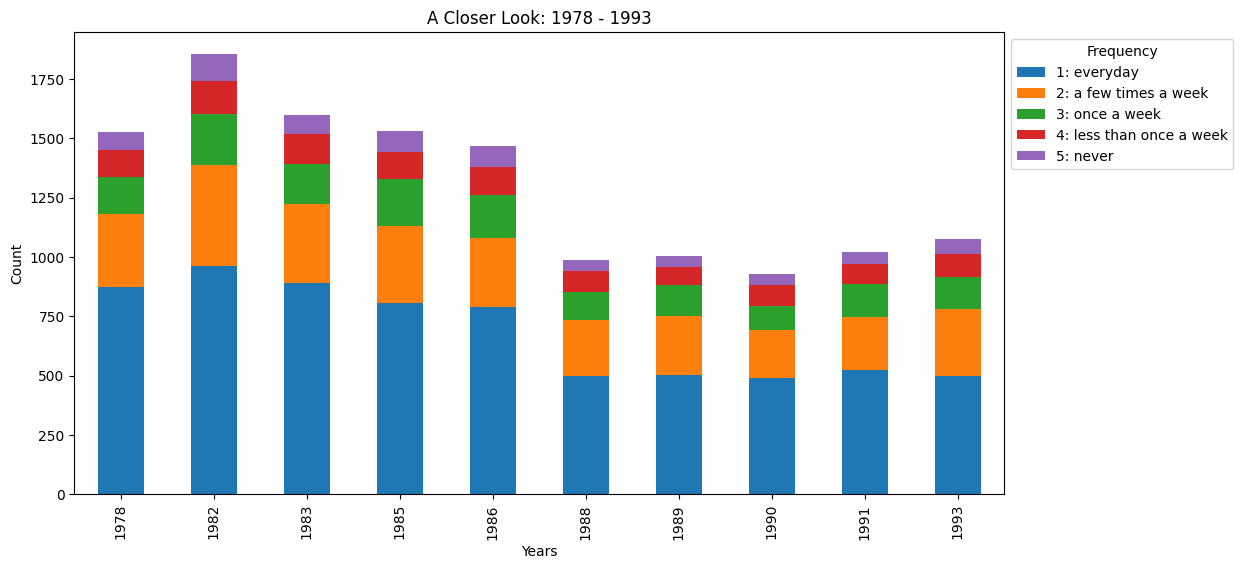

In [10]:
# Stacked Bar Plot for 1978 - 1987 (hoping to show decrease after invention of internet in 1983, this hypothesis is true if we can get the 0's to delete)
# Data cleaning
news = news.apply(pd.to_numeric, errors='coerce')

# Define the years of interest
selected_years = news[[1978, 1982, 1983, 1985, 1986, 1988, 1989, 1990, 1991, 1993]]

# Extract data for these years
data = selected_years

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Transpose the data for a stacked plot
data = data.T

# Create a stacked bar plot
data.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Years')
ax.set_ylabel('Count')
ax.set_title('A Closer Look: 1978 - 1993')
ax.legend(labels=['1: everyday', '2: a few times a week', '3: once a week', '4: less than once a week', '5: never'], title='Frequency', loc='upper left', bbox_to_anchor=(1, 1))


plt.show()

*How has technological advancement impacted readership frequency?*


> At the core of this exploration was our hypothesis that the introduction of the internet in 1983 would catalyze a decline in the consumption of physical newspapers, as individuals increasingly turned to online sources for their news. To evaluate our hypothesis, we zeroed in on a specific time frame, spanning from 1978 to 1987, encapsulating the crucial years before and after the internet's inception. Our graph of choice for this analysis was a stacked bar plot. Within its visual canvas, the x-axis chronicled the specific years, while the y-axis quantified the number of respondents, encapsulating the essence of shifting reading habits. The colors and numbers employed in the legend, consistent with those of the previous line plot, provided a seamless link between the two representations, enhancing clarity and facilitating interpretation.

> A close inspection of the data unfurled some intriguing revelations. Prior to 1983, as denoted by the blue peaks on the plot, readers exhibited a consistent commitment to daily newspaper consumption, evident in the tall bars representing the years 1978 and 1982. However, the turning point was unmistakable; the years after 1988 bore witness to a pronounced plunge in "every day" newspaper reading frequency, as symbolized by the shrinking blue bars, noting that the pervasive effects of the internet took effect years after it was invented.

> In contrast, the other four reading frequencies displayed a degree of stability, with no glaring surges or slumps, reinforcing their resilience in the face of changing technological landscapes. This comprehensive analysis validated our hypothesis and underscored that the internet's ascendancy in the 1990s had indeed ushered in a significant reduction in everyday newspaper reading. This transformation was visually evident in the waning blue bars on our stacked bar plot, providing a concrete link between the advent of technology and evolving reading habits.







**Heatmap: A Look into Readership Trends in the Modern Age**

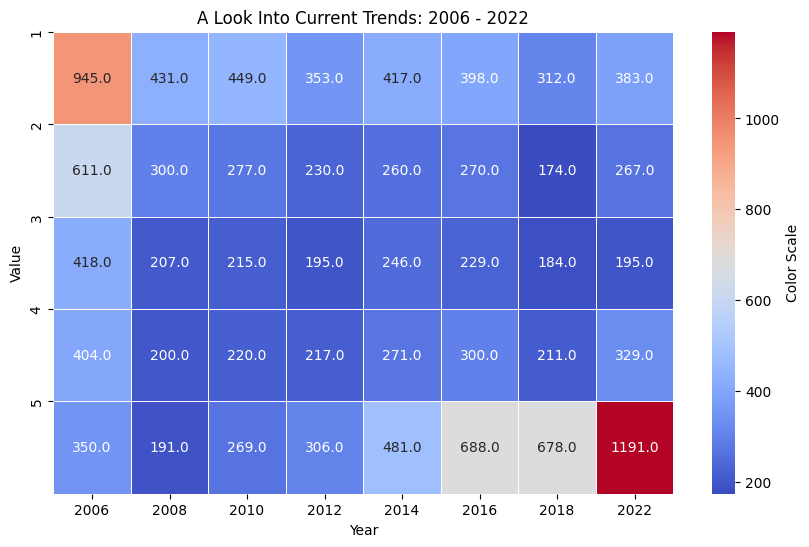

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
custom_palette = sns.color_palette("coolwarm", as_cmap=True)
# Extract the relevant data for the years of interest
years = [2006, 2008, 2010, 2012, 2014, 2016, 2018, 2022]
values = news[years]

# Create a heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(values, cmap=custom_palette, annot=True, fmt=".1f", cbar=True, linewidths=0.5)
plt.yticks(ticks=[0, 1, 2, 3, 4], labels=[1, 2, 3, 4, 5])
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('A Look Into Current Trends: 2006 - 2022')

# Add a legend
cbar = heatmap.collections[0].colorbar
cbar.set_label('Color Scale')  # You can set a custom label for your legend

plt.show()

The decline in the physical reading of newspapers has been noticeable for years. Looking at the years from 1978 to 1993, an explanation for this drop could be attributed to the invention of the internet, where more individuals get their news from various online platforms. To understand the reasons behind this decline, we constructed a heat plot looking at the years 2006 to 2022. In this plot, the x axis represents the years, while the y axis represents the reading frequencies ranging from one to five. The legend shows the number of newspaper readers, with blue indicating low counts of readers and red indicating high counts of readers.


Upon examining the plot, several interesting patterns emerge. Firstly, in 2006, the majority of physical newspaper readers read daily, but by 2022, this pattern had stopped. Secondly, after 2008, the number of people who never read the newspaper increased until 2022, where this number peaked. Lastly, the higher frequencies of reading (one through four) kept decreasing with the passing of each year.


A contributing factor to this trend could be the release of the first iPhone in 2007. Equipped with the Safari app, people could search for whatever their hearts desired online. As time passed, Apple continued to release new phones and apps that could do a lot more than the older models. An example of this is the 2015 News app release. This allowed users to personalize their favorite news sources and news topics. This advancement in technology, led by Apple and other tech companies, changed the way people access and consume information. The evolution of new phones and their features reflects the changes in people's daily habits and their interactions with the world around them.

**Statistics**

*Yearly Means per Year*

In [12]:
# find the weighted sums
weighted_sums = (news * news.index.values[:, None]).sum()

# Compute the total respondents for each year
total_respondents = news.sum()

# Calculate the mean for each year
yearly_means = weighted_sums / total_respondents

filtered_means = yearly_means[yearly_means >= 1] # filtering so that the NAs (0) do not show up in the output and mess up the explanations
print(filtered_means)

Year
Value    2.666667
1993     1.021395
1996     1.151252
1998     1.181818
2000     1.330486
2002     1.277533
2004     1.254967
2006     1.487903
2008     1.563582
2010     1.708392
2012     1.917756
2014     2.082985
2016     2.323607
2018     2.493265
2021     2.300074
2022     2.709514
dtype: float64


For 1993 and 1996, the mean was 1.02 and 1.16, meaning that the respondents read the newspaper every day. Then, from 1996 to 2006, the reading frequency increased to 1.18–1.56, which means that people's reading frequency ranged from every day to a few times a week. Lastly, from 2010 to 2022, the reading frequency increased from 1.7 to 2.7, meaning that people started to read the newspaper less frequently; it changed from every day to a few times per week and possibly to once a week. Generally, there is a rise in the reading frequency, suggesting that newspapers are being read less frequently.

*Yearly Median per Year*

In [13]:
# Compute the cumulative sum across frequencies for each year
cumulative_sums = news.cumsum()

# Compute the total respondents for each year
total_respondents = news.sum()

# Identify where the cumulative sum surpasses half of the total count
median_indices = (cumulative_sums.gt(total_respondents / 2)).idxmax()
# the .gt sees where each value is bigger than half the total correspondents
# .idmax is the median frequency

# The output has values one and greater
filtered_medians = median_indices[median_indices >= 1]


print(filtered_medians)


Year
Value    3
1989     1
1993     1
1994     1
1996     1
1998     1
2000     1
2002     1
2004     1
2006     1
2008     1
2010     1
2012     2
2014     2
2016     3
2018     3
2021     3
2022     4
dtype: int64


From 1989 to 2010, the median was 1, meaning that more than half of the respondents read the newspaper every day. Then for 2012–2022, the median increased to 2, then to 3, and finally to 4. This means that the respondents shifted from reading the newspaper a few times per week to once a week, and then less than once a week. Overall, this indicates a decline in the frequency of reading the newspapers from 1972 to 2022; it began with people reading the newspapers every day and ended with people reading newspapers less than once a week.

*Yearly Mode*

In [14]:
modes = news.idxmax()  # return the index ( frequency of reading) for the value that occurs the highest in each year
filtered_modes = modes[modes >= 1]
print(filtered_modes)


Year
Value    4
2014     4
2016     4
2018     4
2021     4
2022     4
dtype: int64


The mode is 4 from 2014 to 2022, which means that for the period 2014 to 2022, respondents said they didn't read the paper more than once a week, which shows that in recent years, people have been using other ways to get their news.

*Yearly Standard Deviation*

In [15]:
# Calculate the standard deviation for each year
std_devs = news.std()

# Filter the standard deviations to only have values of 1 or greater
filtered_std_devs = std_devs[std_devs >= 1]

print(filtered_std_devs)


Year
Value      1.581139
1972     443.229850
1975     387.756109
1977     368.003804
1978     329.586559
1982     352.063489
1983     332.983033
1985     294.739716
1986     287.423555
1987     346.373642
1988     182.888764
1989     184.783657
1990     179.059487
1991     190.144156
1993     178.336760
1994     350.697448
1996     275.216824
1998     261.957058
2000     209.738647
2002     116.029307
2004     112.825972
2006     244.125582
2008     102.277564
2010      95.310020
2012      66.593543
2014     106.866739
2016     184.691635
2018     211.887234
2021     296.945618
2022     407.455519
dtype: float64


The higher values such as 443,387,368, and 407 for the years 1972, 1975, 1977, and 2022 (respectively) mean that there is variability in people's reading habits; there are people reading more frequently and also people reading less frequently. On the other hand, lower values such as 116, 112, 95, and 66 in the years 2002, 2004, 2010, and 2012 (respectively) mean that there is less variability in people's reading habits; most people read the newspaper a few times a week, and there are no other people that might read the newspaper every day. Overall, this generally shows that in recent years, people have read at the same frequency as people in older years. With the help of the mean, median, and mode, we can say that in recent years, people read with less frequency than in older years.

# Overall Discussion

In our pursuit of understanding the shifts in physical newspaper readership and the impact of technological innovations, we harnessed the power of data visualization and statistical analysis. Our line plot became a window into the changing landscape of newspaper consumption, with a clear narrative emerging over time. It vividly portrayed a discernible decline in readers' affinity for physical newspapers as the years progressed, underscoring a substantial transformation in reading habits.

> Conversely, our stacked bar plot delved into the intriguing connection between the advent of the internet in 1983 and newspaper readership. It offered a visual story that pinpointed a significant drop in "every day" newspaper consumption precisely when the internet entered the scene. This robustly supported our hypothesis that technological innovations, specifically the internet, played a pivotal role in reshaping readers' behaviors and preferences.


> The backing of our conclusions was further solidified by a comprehensive statistical analysis. The mean values revealed a notable shift towards less frequent reading, particularly in the recent past. This was a compelling indicator of how readers had transitioned from daily newspaper consumption to a more sporadic engagement. The median values echoed this trend, demonstrating that more than half of respondents now read newspapers less often. Concurrently, the mode provided valuable insights into the contemporary media landscape, showcasing the increasing popularity of alternative news sources.
                     
In all, our investigation illuminated the profound impact of the internet on the newspaper industry, resulting in a significant decline in the number of people relying on physical newspapers for their news. The convergence of compelling visual narratives and robust statistical evidence leaves little doubt about this transformative shift in readers' habits and their evolving relationship with traditional newspapers.

# Conclusion

**Summary**

Our investigation into the frequency of physical newspaper reading throughout the years has yielded significant insights into the shifting landscape of media consumption. We have demonstrated that this transformation is closely tied to the advent of technological innovations, particularly the internet, and have provided compelling evidence to support this assertion. The key findings underscore the imperative for both traditional print media and digital news outlets to adapt to changing reader behaviors. Furthermore, our work has important implications for policymakers, media organizations, and researchers seeking to understand the dynamics of media consumption in the contemporary age.



> One of the most profound and consistent findings of our research is the persistent decline in newspaper readership. This decline extends across all categories of readers, irrespective of whether they read daily or with less frequency. The evidence points to a discernible trend of dwindling engagement with conventional print newspapers. While this trend was observable over the entire span of our data, it became particularly pronounced during the early 2000s, a period that coincided with the rapid expansion of internet access and the introduction of mobile phones with web-browsing capabilities. This decline is emblematic of a society increasingly gravitating toward digital platforms as the primary source of news and information. It raises critical questions about the future viability of traditional print media and highlights the urgency of adaptation. As the decline in newspaper readership is inexorably tied to the ascendancy of digital media, this challenges news organizations to redefine their models and embrace the digital frontier. This transformative moment in journalism compels us to reconsider how news is created, disseminated, and consumed, requiring renewed emphasis on technological literacy and media ethics.





**Future Work**

While our findings provide crucial insights into evolving media consumption patterns, they beckon further exploration. Foremost among the questions demanding answers is the causal relationship between specific technological milestones and shifts in newspaper readership. While our study indicates the profound impact of the internet, an in-depth analysis of individual technological events or innovations could shed light on the intricacies of these changes. For example, investigating the influence of social media or digital-native news outlets on readership trends may illuminate the specific channels through which technology has reshaped media consumption. This would help in identifying the precise dynamics of the technological influence on media habits, thus enabling more effective strategies for adapting to evolving reader preferences.                                                     
   

> The intersection of demographic variables with media consumption patterns is another realm rich in potential for future research. Variables such as age, location, income, and education play pivotal roles in shaping the nuances of these trends. Deeper exploration of how different demographic segments respond to the technological shifts in media consumption is necessary. This is especially pertinent given the potential social and political ramifications of altered information ecosystems for different demographic groups. Investigating these intersections will allow us to gain more nuanced insights into the social and cultural dimensions of these transformations.

> In addition, our research has been primarily centered on the United States, and extending these inquiries to encompass international contexts could offer valuable comparative perspectives. Examining the differences in media consumption trends across various countries and regions with differing levels of technological penetration would provide a more comprehensive understanding of global media dynamics. This global perspective is vital for capturing the influence of cultural, economic, and political factors on media consumption on an international scale, which is becoming increasingly important in our interconnected world.


In conclusion, our research serves as a pivotal contribution to the ongoing discourse on the shifting media landscape. It underscores that the decline in newspaper readership is more than just a change in reading habits; it encapsulates a broader transformation in the way people access and interact with information. This transformation heralds significant questions about the future of journalism, the sustainability of traditional print media, and the responsibilities of digital news outlets. The changing dynamics of media consumption are not only relevant to the media industry but to society as a whole. As we navigate an era of unparalleled technological advancement, understanding these dynamics is of utmost importance. It signifies our capacity to adapt, innovate, and sustain our commitment to a well-informed and participatory society in the digital age.